## Neural Network Hallucinate

In this project I have taken an input image and apply some hallucination effects to it using genrative models.

#### To accomplish this task, I will:

- Process an input image
- Feed this image through a pre-trained Image Classification model
- Take the output of some hidden layers and "amplify" the activation signals
- Re-construct a new image with these neurons amplified

I will be using TensorFlow/Keras for this task. It is advantageous to be fluent in both frameworks and understand which one is best to use for this project.

### Implementing Dependencies

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import inception_v3
from PIL import Image

#### Pre- and post-process

- Preprocess: Load and normalize the input image to between[-1, 1]
    
- Postprocess: Convert the range [-1,1] to [0,255] and data type to uint8

In [2]:
def preprocess_image(image_path):
    img = keras.preprocessing.image.load_img(image_path)
    img = keras.preprocessing.image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.0
    x += 0.5
    x *= 255.0
    x = np.clip(x, 0, 255).astype("uint8")
    return x

### Defining the Model

We will use InceptionV3 as the basline model.

I have constructed a new model that outputs the activations of some hidden layers from our baseline model.

In [3]:
model = inception_v3.InceptionV3(weights="imagenet", include_top=False)

names = ['mixed4', 'mixed5', 'mixed6', 'mixed7']
layers = [model.get_layer(name).output for name in names]

feature_extractor = keras.Model(inputs=model.inputs, outputs=layers)

#### How we can tell which layers to choose?

Method 1 : I have used summary() method in TensorFlow to get a list of layer's names.

In [4]:
feature_extractor.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   12288       ['max_pooling2d_1[0][0]']        
                                64)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_18 (Conv2D)             (None, None, None,   16384       ['average_pooling2d_1[0][0]']    
                                64)                                                               
                                                                                                  
 batch_normalization_12 (BatchN  (None, None, None,   192        ['conv2d_12[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   192        ['conv2d_14[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 batch_nor

                                                                                                  
 batch_normalization_25 (BatchN  (None, None, None,   192        ['conv2d_25[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_19 (Activation)     (None, None, None,   0           ['batch_normalization_19[0][0]'] 
                                64)                                                               
                                                                                                  
 activation_21 (Activation)     (None, None, None,   0           ['batch_normalization_21[0][0]'] 
                                64)                                                               
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   114688      ['activation_35[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_31 (BatchN  (None, None, None,   384        ['conv2d_31[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 batch_normalization_36 (BatchN  (None, None, None,   384        ['conv2d_36[0][0]']              
 ormalization)                  128)                                                              
          

 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_45 (Conv2D)             (None, None, None,   179200      ['activation_44[0][0]']          
                                160)                                                              
                                                                                                  
 batch_normalization_45 (BatchN  (None, None, None,   480        ['conv2d_45[0][0]']              
 ormalization)                  160)                                                              
          

 activation_48 (Activation)     (None, None, None,   0           ['batch_normalization_48[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_49 (Activation)     (None, None, None,   0           ['batch_normalization_49[0][0]'] 
                                192)                                                              
                                                                                                  
 mixed5 (Concatenate)           (None, None, None,   0           ['activation_40[0][0]',          
                                768)                              'activation_43[0][0]',          
                                                                  'activation_48[0][0]',          
                                                                  'activation_49[0][0]']          
          

 batch_normalization_53 (BatchN  (None, None, None,   576        ['conv2d_53[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_58 (BatchN  (None, None, None,   576        ['conv2d_58[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_59 (BatchN  (None, None, None,   576        ['conv2d_59[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_50 (Activation)     (None, None, None,   0           ['batch_normalization_50[0][0]'] 
          

 conv2d_60 (Conv2D)             (None, None, None,   147456      ['mixed6[0][0]']                 
                                192)                                                              
                                                                                                  
 conv2d_63 (Conv2D)             (None, None, None,   258048      ['activation_62[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_68 (Conv2D)             (None, None, None,   258048      ['activation_67[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_69 (Conv2D)             (None, None, None,   147456      ['average_pooling2d_6[0][0]']    
          

Method 2 : Visualize with Netron
    
    - Save the model >>>feature_extractor.save('extractor.h5')
    - Load and inspect the model with Netorn.
    - There are some "traffic intersections" in this model, look like they should contain useful signals, let's use this.
    - Each layer of the network learns the image at a different level of abstraction. Generally, the first layers are more sensitive to basic features such as edges, color, and shapes. While the deeper layers may contain more information about objects, contexts

In [5]:
feature_extractor.save('extractor.h5')

### Defining Loss Function

We'll use the loss function:

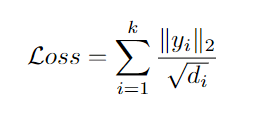

where y_i's are the activation ouputs of the feature extractor model, and d_i's are the sizes (the product of dimesions) of these outputs.

 - We want to capture where the neurons "activate" the most
 - The norm of feature maps corresponds to the signals from these layers
 - A large loss value means the feature maps detected lots of "hidden contexts" in the image
 - We normalize with respect to the output sizes so that all chosen layers can contribute equally to the loss   

In [6]:
def compute_loss(input_image):
    features = feature_extractor(input_image)
    loss = tf.zeros(shape=())
    for activation in features:
        scaling = tf.reduce_prod(tf.cast(tf.shape(activation), "float32"))
        loss += tf.norm(activation) / scaling
    return loss

### Defining Update Rule

I'll use Gradient Descent to minimize the objective loss. However, it is NOT the case here:

- Minimizing the loss function means minimizing the norm of output activations. This is not our true objective.
- The activation signals are what we want to inject into our image (the things that the model sees, but we can't)
- So we want to keep the model's weights constant. We will only enhance our input image using the activation signals.

#### Gradient Ascent!

In [7]:
@tf.function
def gradient_ascent_step(img, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img)
        
    # Compute gradients and normalize
    grads = tape.gradient(loss, img)
    grads /= tf.maximum(tf.reduce_mean(tf.abs(grads)), 1e-6)
    
    img += learning_rate * grads
    return loss, img


def gradient_ascent_loop(img, iterations, learning_rate):
    for i in range(iterations):
        loss, img = gradient_ascent_step(img, learning_rate)
        print("... Loss value at step %d: %.2f" % (i, loss))
    return img

### Putting It All Together

In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 566D-684B

 Directory of C:\Users\mrsks\OneDrive\Desktop\Projects

23-08-2022  14:20    <DIR>          .
23-08-2022  11:06    <DIR>          ..
23-08-2022  11:13    <DIR>          .ipynb_checkpoints
23-08-2022  13:16           728,667 1_yeeKeLImV4A7Advkdt0TeA.png
23-08-2022  14:21        36,542,224 extractor.h5
23-08-2022  14:20           965,625 hallucinated.png
23-08-2022  14:20           101,208 Neural Network Hallucinate.ipynb
23-08-2022  12:16             5,394 Screenshot 2022-08-23 121641.png
               5 File(s)     38,343,118 bytes
               3 Dir(s)  426,999,877,632 bytes free


In [9]:
BASE_IMAGE_PATH = "C:\\Users\\mrsks\\OneDrive\\Desktop\\Projects\\1_yeeKeLImV4A7Advkdt0TeA.png"
STEP = 0.01  # Gradient ascent step size
NUM_OCTAVE = 3  # Number of scales at which to run gradient ascent
OCTAVE_SCALE = 1.4  # Size ratio between scales
ITERATIONS = 20  # Number of ascent stepss per scale

original_img = preprocess_image(BASE_IMAGE_PATH)
original_shape = original_img.shape[1:3]    # or [720,1080] if you run out of memory
successive_shapes = [original_shape]
for i in range(1, NUM_OCTAVE):
    shape = tuple([int(dim / (OCTAVE_SCALE ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img)  # Make a copy
for i, shape in enumerate(successive_shapes):
    print("Processing octave %d with shape %s" % (i, shape))
    img = tf.image.resize(img, shape)
    img = gradient_ascent_loop(img, iterations=ITERATIONS, learning_rate=STEP)
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
    same_size_original = tf.image.resize(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = tf.image.resize(original_img, shape)

Image.fromarray(deprocess_image(img.numpy())).show()
Image.fromarray(deprocess_image(img.numpy())).save('hallucinated.png')

Processing octave 0 with shape (535, 357)
... Loss value at step 0: 0.00
... Loss value at step 1: 0.00
... Loss value at step 2: 0.00
... Loss value at step 3: 0.00
... Loss value at step 4: 0.00
... Loss value at step 5: 0.00
... Loss value at step 6: 0.00
... Loss value at step 7: 0.00
... Loss value at step 8: 0.00
... Loss value at step 9: 0.00
... Loss value at step 10: 0.00
... Loss value at step 11: 0.00
... Loss value at step 12: 0.00
... Loss value at step 13: 0.00
... Loss value at step 14: 0.00
... Loss value at step 15: 0.00
... Loss value at step 16: 0.00
... Loss value at step 17: 0.00
... Loss value at step 18: 0.01
... Loss value at step 19: 0.01
Processing octave 1 with shape (750, 500)
... Loss value at step 0: 0.00
... Loss value at step 1: 0.00
... Loss value at step 2: 0.00
... Loss value at step 3: 0.00
... Loss value at step 4: 0.00
... Loss value at step 5: 0.00
... Loss value at step 6: 0.00
... Loss value at step 7: 0.00
... Loss value at step 8: 0.00
... Los

# Conclusion

This project is a nice example of generative models in Machine Learning. Instead of modifying the weights to minimize the loss, we enhance the input image using the gradient to maximize this loss. As we iteratively repeat this process, the image can gradually gain extra signals from the model, previously hidden from our eyes.

Hopefully, you will have fun following along with this tutorial and be able to create some beautiful midsummer night’s dreams.